In [1]:
import os
import pandas as pd
import numpy as np

In [11]:
import sklearn.model_selection as model_selection

In [13]:
import sklearn.tree as tree

In [17]:
import sklearn.metrics as metrics

In [ ]:
# Decision Tree Classifier

In [2]:
df = pd.read_csv('credit_history.csv')
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [3]:
df.shape

(7727, 7)

In [4]:
df.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [5]:
df['years'].describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

In [6]:
df['years'].fillna(4,inplace=True)

In [7]:
df = pd.get_dummies(df)

In [8]:
df.head()

,default,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,0,1000,2.0,19200.0,24,0,1,0,0,0,0,0,0,0,0,1
1,1,6500,2.0,66000.0,28,1,0,0,0,0,0,0,1,0,0,0
2,0,2400,2.0,60000.0,36,1,0,0,0,0,0,0,0,0,0,1
3,0,10000,3.0,62000.0,24,0,0,1,0,0,0,0,0,0,0,1
4,1,4000,2.0,20000.0,28,0,0,1,0,0,0,0,0,0,0,1


In [10]:
X = df.drop('default',axis=1)
y = df['default']

In [12]:
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
clf = tree.DecisionTreeClassifier(max_depth=3,random_state=200)

In [15]:
clf.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=3, random_state=200)

In [16]:
clf.score(Xtest, ytest)

0.6144890038809832

In [20]:
metrics.roc_auc_score(ytest,clf.predict_proba(Xtest)[:,1])

0.6569529472326883

In [21]:
import pydotplus
import graphviz

In [22]:
os.environ['PATH'] += os.pathsep + 'C:\Program Files\Graphviz\bin'

In [27]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=X.columns,
                               class_names=['0','1'],
                               filled=True, rounded=True,
                               special_characters=True, proportion=True)

In [28]:
graph = graphviz.Source(dot_data, format='png')

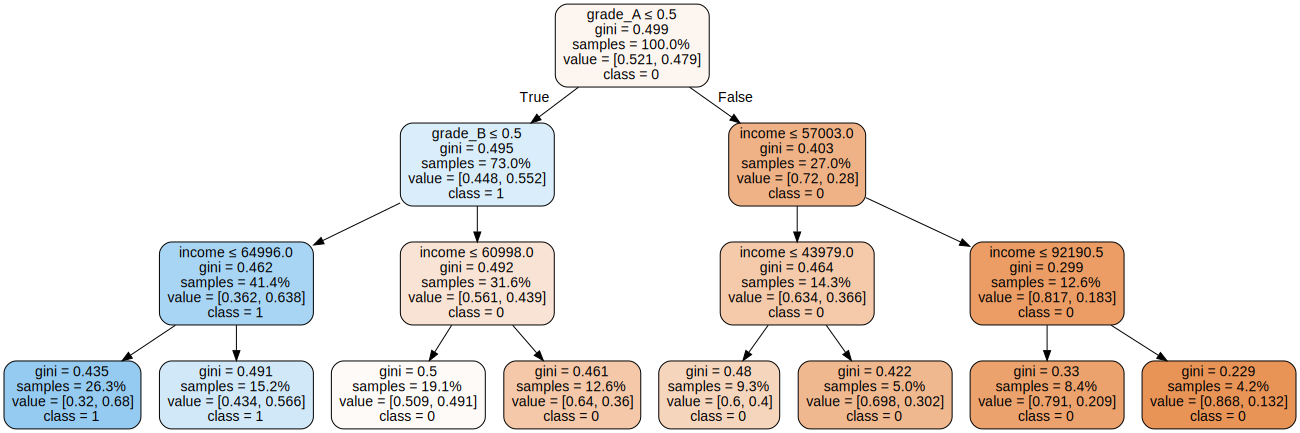

In [29]:
graph

In [30]:
graph.render('dt_classifier',view=True)

'dt_classifier.png'

In [35]:
clf = tree.DecisionTreeClassifier(max_depth=3,random_state=200)

In [40]:
mod = model_selection.GridSearchCV(clf, param_grid={'max_depth':[2,3,4,5],\
                                                    'criterion':['gini', 'entropy'],\
                                                    'max_leaf_nodes': list(range(2, 100)),\
                                                    'min_samples_split': [2, 3, 4]})

In [41]:
mod.fit(Xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, random_state=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [42]:
mod.best_estimator_

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=13, random_state=200)

In [43]:
mod.best_score_

0.6371136191799243

In [45]:
clf = tree.DecisionTreeClassifier(max_depth=5,max_leaf_nodes=13,random_state=200)

In [47]:
clf.fit(X,y)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=13, random_state=200)

In [48]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=X.columns,
                               class_names=['0','1'],
                               filled=True, rounded=True,
                               special_characters=True, proportion=True)

In [49]:
graph = graphviz.Source(dot_data, format='png')

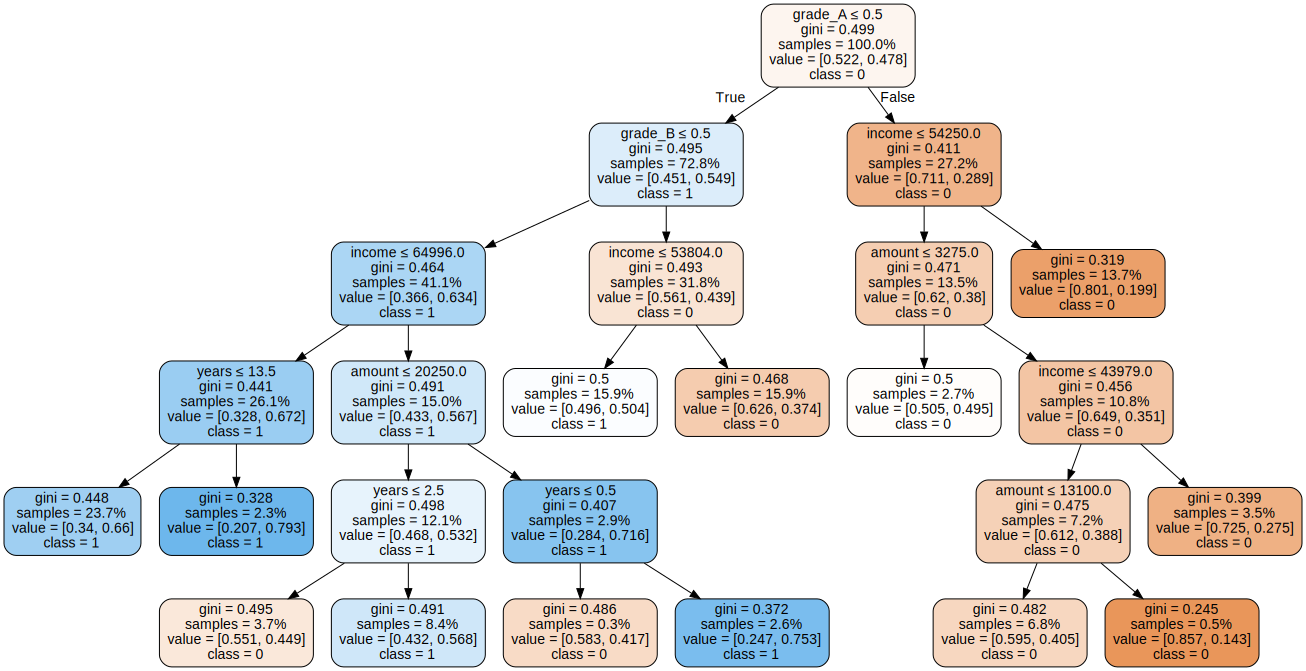

In [50]:
graph

In [51]:
graph.render('dt_classifier',view=True)

'dt_classifier.png'

In [ ]:
# Decision Tree Regressor

In [52]:
dat = pd.read_csv('dm.csv')
dat.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [53]:
dat = pd.get_dummies(dat)

In [54]:
dat.head()

,Salary,Children,Catalogs,AmountSpent,Cust_Id,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,47500,0,6,755,247,0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,63600,0,6,1318,127,1,0,0,0,1,0,1,0,1,1,0,1,0,0
2,13500,0,18,296,479,0,0,1,1,0,0,1,0,1,1,0,0,1,0
3,85600,1,18,2436,475,1,0,0,0,1,1,0,1,0,1,0,1,0,0
4,68400,0,12,1304,151,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [55]:
X = dat.drop(['Cust_Id','AmountSpent'],axis=1)
y = dat['AmountSpent']

In [56]:
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
reg = tree.DecisionTreeRegressor(max_depth=3, random_state=300)

In [58]:
reg.fit(Xtrain, ytrain)

DecisionTreeRegressor(max_depth=3, random_state=300)

In [59]:
reg.score(Xtest,ytest)

0.5779562292959421

In [60]:
reg.feature_importances_

array([0.70483259, 0.        , 0.18065203, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03196313, 0.08255225])

In [63]:
pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending=False).head()

Salary            0.704833
Catalogs          0.180652
History_Medium    0.082552
History_Low       0.031963
Age_Middle        0.000000
dtype: float64

In [64]:
dot_data = tree.export_graphviz(reg, out_file=None,
                               feature_names=X.columns,
                               filled=True, rounded=True,
                               special_characters=True, proportion=True)

In [65]:
graph = graphviz.Source(dot_data, format='png')

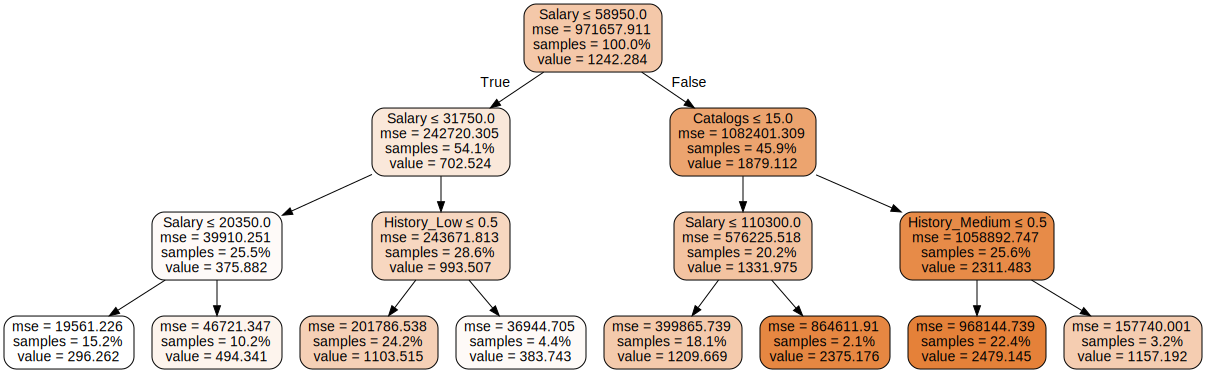

In [66]:
graph

In [67]:
graph.render('dt_regressor',view=True)

'dt_regressor.png'